In [1]:
# Manipulação de Dados
import pandas as pd
import numpy as np
from collections import Counter

# Visualização de Dados
import matplotlib.pyplot as plt
import seaborn as sns

# Análise de Palavras
import re
import nltk
import spacy
from wordcloud import WordCloud, STOPWORDS
nltk.download('all', quiet = True)

# Remover avisos
import warnings
warnings.filterwarnings('ignore')

In [2]:
from Modulos.FUNCAO_Transforma_Dataframe import transforma_dataframe
from Modulos.FUNCAO_Nuvem_Palavras import nuvem_palavras
from Modulos.FUNCAO_Conta_Palavras import conta_palavras
from Modulos.FUNCAO_Bag_Words import bag_words
from Modulos.CLASSE_Cria_Ngramas import Cria_Ngramas

### Carregando e Inspecionando os Dados

In [3]:
df = pd.read_csv('netflix_titles.csv')

In [4]:
df.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Realizando Transformações

In [7]:
df = transforma_dataframe(df)

### Análise Exploratória

#### Tipo de Entretenimento

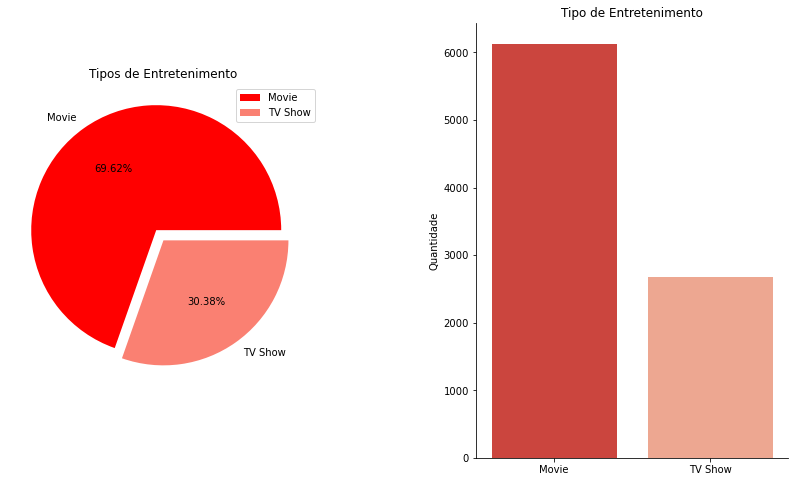

In [8]:
fig, axs = plt.subplots(1, 2, figsize = (14, 8))

# Pie Chart
labels = ['Movie', 'TV Show']
colors = ['Red', 'Salmon']
explode = [0.1, 0]

axs[0].pie(df['type'].value_counts(), labels = labels, autopct = '%.2f%%', colors = colors,
           explode = explode)

axs[0].set_title('Tipos de Entretenimento', fontsize = 12)
axs[0].legend(loc = 'upper right')


# Barplot
axs[1] = sns.countplot(x = df['type'], palette = 'Reds_r')

axs[1].set_title('Tipo de Entretenimento', fontsize = 12)
axs[1].set_xlabel('')
axs[1].set_ylabel('Quantidade')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

# Plot
fig.subplots_adjust(wspace = 0.5)
plt.show();

#### Anos de Lançamento

Lançamentos nos últimos 20 anos!

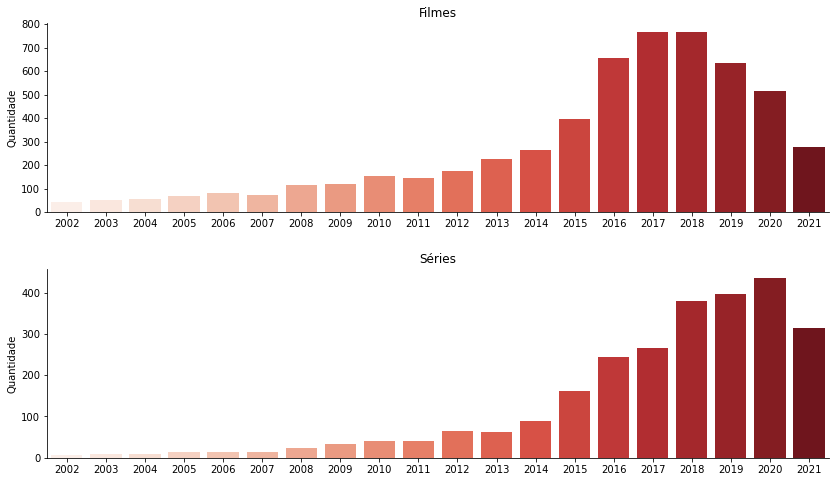

In [9]:
# Filtrando para obter gráficos
df_graph = df.groupby(['type',
                       'release_year'],
                       as_index = False)['title'].count().sort_values(by = 'title', ascending = False)

# Criando visualização
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (14, 8))

#  Filme
sns.barplot(data = df_graph[df_graph['type'] == 'Movie'].head(20),
            x = 'release_year', y = 'title', palette = 'Reds', ax = ax1)

ax1.set_title('Filmes', fontsize = 12)
ax1.set_xlabel('')
ax1.set_ylabel('Quantidade')
ax1.tick_params(axis = 'x', rotation = 0)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Séries
sns.barplot(data = df_graph[df_graph['type'] == 'TV Show'].head(20),
            x = 'release_year', y = 'title', palette = 'Reds', ax = ax2)

ax2.set_title('Séries', fontsize = 12)
ax2.set_xlabel('')
ax2.set_ylabel('Quantidade')
ax2.tick_params(axis = 'x', rotation = 0)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Plot
fig.subplots_adjust(hspace = 0.3)
plt.show();

#### Meses do ano com mais adição de filmes e séries

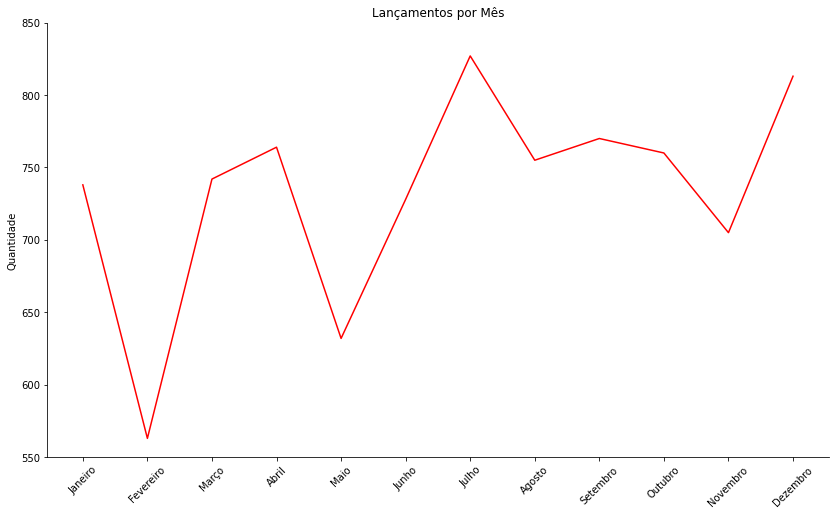

In [10]:
# Filtrando as observações
df_graph = df.copy()
df_graph = df_graph.dropna(subset = ['date_added'])
df_graph['mes_added'] = df_graph['date_added'].dt.month
df_graph = df_graph.groupby(['mes_added'], as_index = False)['title'].count()
df_graph['mes_added'] = df_graph['mes_added'].astype(int)

# Criando visualização
fix, ax = plt.subplots(figsize = (14, 8))

sns.lineplot(data = df_graph, x = 'mes_added', y = 'title', color = 'red')
ax.set_title('Lançamentos por Mês', fontsize = 12)
ax.set_xlabel('')
ax.set_ylabel('Quantidade')
ax.set_xticks(range(1, 13, 1))

meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
         'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

ax.set_xticklabels(meses, rotation = 45)
ax.set_yticks(range(550, 900, 50))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show();

#### Duração dos Filmes e das Temporadas

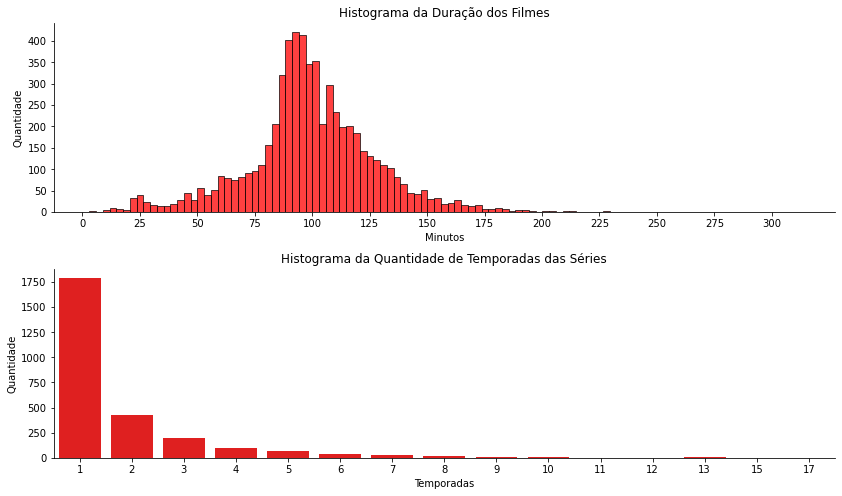

In [11]:
# Filtrando as observações
df_aux = df.copy()
df_aux = df_aux.dropna(subset = ['duration'])

# Criando visualização para filmes
df_aux_filmes = df_aux[df_aux['type'] == 'Movie']
df_aux_filmes['duration'] = df_aux_filmes['duration'].str.replace(' min', '').astype(int)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (14, 8))
sns.histplot(data = df_aux_filmes, x = 'duration', color = 'red', ax = ax1)
ax1.set_title('Histograma da Duração dos Filmes', fontsize = 12)
ax1.set_xlabel('Minutos')
ax1.set_ylabel('Quantidade')
ax1.set_xticks(range(0, 325, 25))
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Criando visualização para séries
df_aux_series = df_aux[df_aux['type'] == 'TV Show']
df_aux_series['duration'] = df_aux_series['duration'].str.replace('\D', '', regex = True).astype(int)

sns.countplot(data = df_aux_series, x = 'duration', color = 'red', ax = ax2)
ax2.set_title('Histograma da Quantidade de Temporadas das Séries', fontsize = 12)
ax2.set_xlabel('Temporadas')
ax2.set_ylabel('Quantidade')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Plot
fig.subplots_adjust(hspace = 0.3)
plt.show();

#### Rating

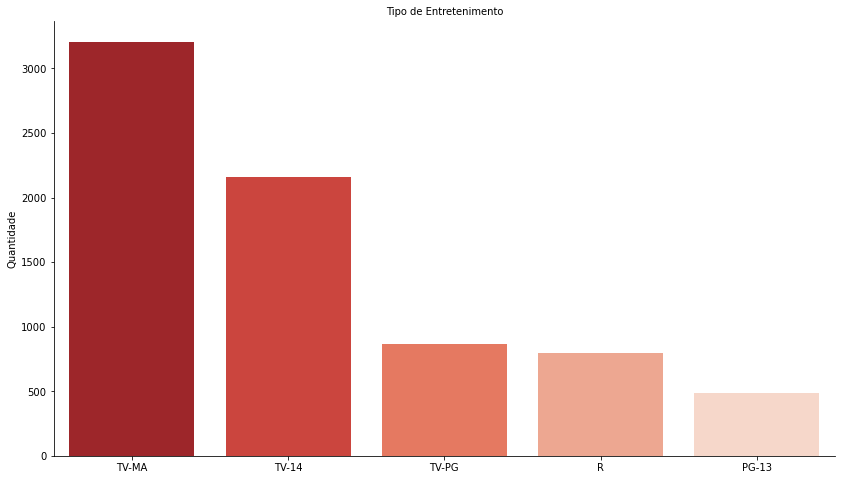

In [12]:
# Filtrando observações
df_aux = df.copy()
df_aux = df_aux.dropna(subset = ['rating'])
df_graph = df_aux.groupby(['rating'], as_index = False)['title'].count().sort_values(by = 'title', ascending = False).head(5)

# Criando visualização
fig, ax = plt.subplots(figsize = (14, 8))

ax = sns.barplot(data = df_graph, x = 'rating', y = 'title', palette = 'Reds_r')

ax.set_title('Tipo de Entretenimento', fontsize = 10)
ax.set_xlabel('')
ax.set_ylabel('Quantidade')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show();

#### Países mais frequentes

Por filmes e séries!

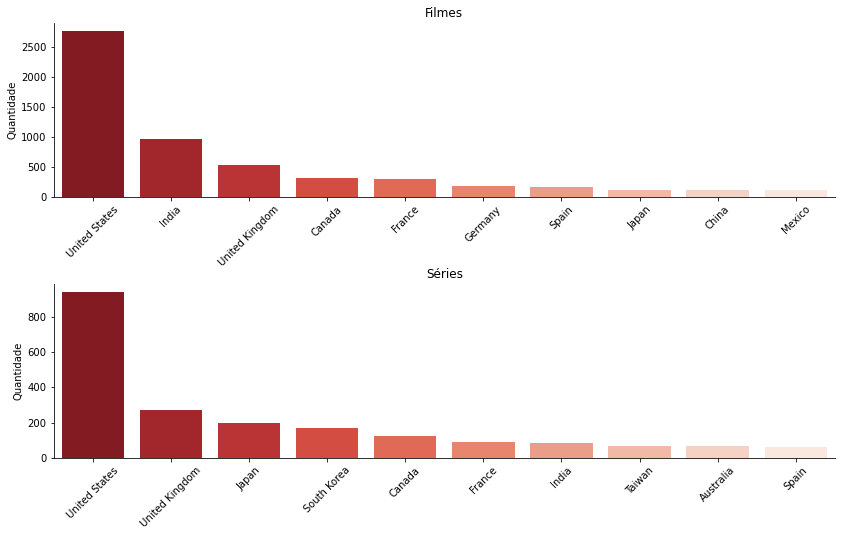

In [13]:
# Filmes
paises_filmes = conta_palavras(df[df['type'] == 'Movie'], 'country')
paises_filmes.most_common(10)
paises_filmes = pd.DataFrame.from_dict(paises_filmes, orient = 'index').reset_index()
paises_filmes.columns = ['pais', 'quantidade']
paises_filmes = paises_filmes.sort_values(by = 'quantidade', ascending = False).head(10)

# Séries
paises_series = conta_palavras(df[df['type'] == 'TV Show'], 'country')
paises_series.most_common(10)
paises_series = pd.DataFrame.from_dict(paises_series, orient = 'index').reset_index()
paises_series.columns = ['pais', 'quantidade']
paises_series = paises_series.sort_values(by = 'quantidade', ascending = False).head(10)



fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (14, 8))

# Série
sns.barplot(data = paises_filmes, x = 'pais', y = 'quantidade', palette = 'Reds_r', ax = ax1)

ax1.set_title('Filmes', fontsize = 12)
ax1.set_xlabel('')
ax1.set_ylabel('Quantidade')
ax1.tick_params(axis = 'x', rotation = 45)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Filme
sns.barplot(data = paises_series, x = 'pais', y = 'quantidade', palette = 'Reds_r', ax = ax2)
ax2.set_title('Séries', fontsize = 12)
ax2.set_xlabel('')
ax2.set_ylabel('Quantidade')
ax2.tick_params(axis = 'x', rotation = 45)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Plot
fig.subplots_adjust(hspace = 0.5)
plt.show();

#### Atores com mais trabalhos

In [14]:
atores = conta_palavras(df, 'cast')
atores.most_common(10)

[('Anupam Kher', 43),
 ('Shah Rukh Khan', 35),
 ('Julie Tejwani', 33),
 ('Naseeruddin Shah', 32),
 ('Takahiro Sakurai', 32),
 ('Rupa Bhimani', 31),
 ('Akshay Kumar', 30),
 ('Om Puri', 30),
 ('Yuki Kaji', 29),
 ('Amitabh Bachchan', 28)]

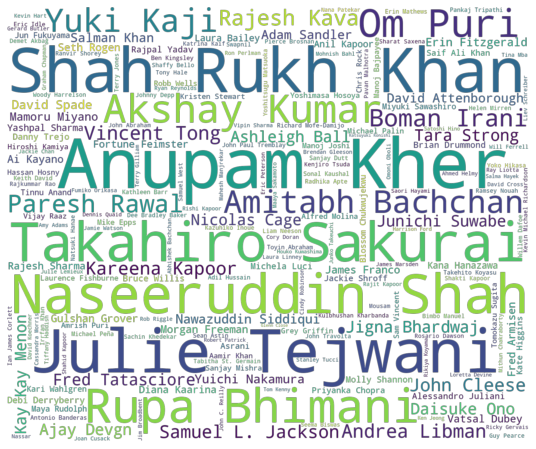

In [15]:
nuvem_palavras(atores)

#### Diretores

In [16]:
diretores = conta_palavras(df, 'director')
diretores.most_common(10)

[('Rajiv Chilaka', 22),
 ('Jan Suter', 21),
 ('Raúl Campos', 19),
 ('Suhas Kadav', 16),
 ('Marcus Raboy', 16),
 ('Jay Karas', 15),
 ('Cathy Garcia-Molina', 13),
 ('Youssef Chahine', 12),
 ('Martin Scorsese', 12),
 ('Jay Chapman', 12)]

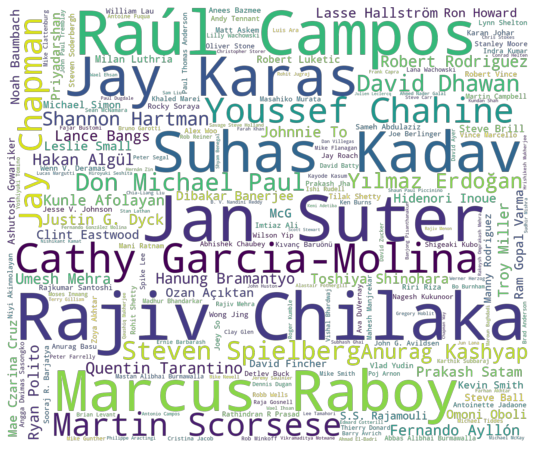

In [17]:
nuvem_palavras(diretores)

#### Temas

In [18]:
temas = conta_palavras(df, 'listed_in')
temas.most_common(10)

[('International Movies', 2752),
 ('Dramas', 2427),
 ('Comedies', 1674),
 ('International TV Shows', 1351),
 ('Documentaries', 869),
 ('Action & Adventure', 859),
 ('TV Dramas', 763),
 ('Independent Movies', 756),
 ('Children & Family Movies', 641),
 ('Romantic Movies', 616)]

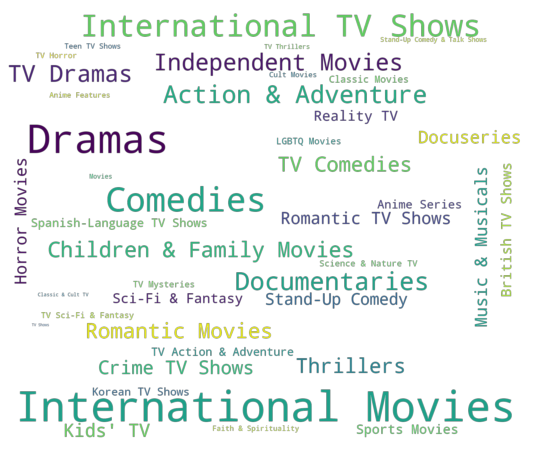

In [19]:
nuvem_palavras(temas)

### Aplicando conceitos de PLN

#### Filmes

In [20]:
palavras = bag_words(df, 'Movie')
testando = Cria_Ngramas(palavras)
print(testando.Bigramas().head(10))
print('-' * 60)
print(testando.Trigramas().head(10))
print('-' * 60)
print(testando.Quadrigramas().head(10))

                  Bigrama  Freq   Teste-t
0            (young, man)    97  9.575708
1          (young, woman)    92  9.279807
2          (high, school)    80  8.912693
3             (new, york)    78  8.784730
4          (best, friend)    72  8.429672
5            (fall, love)    50  6.964456
6           (true, story)    45  6.662316
7     (stand-up, special)    44  6.597892
8           (based, true)    40  6.304818
9  (documentary, follows)    40  6.270855
------------------------------------------------------------
                  Trigrama  Freq   Teste-t
0        (new, york, city)    30  5.477106
1         (world, war, ii)    26  5.098985
2     (based, true, story)    26  5.098960
3     (based, true, event)    12  3.464064
4   (high, school, senior)    11  3.316604
5        (must, find, way)    10  3.161375
6   (life, turned, upside)     8  2.828410
7     (based, real, event)     8  2.828404
8  (must, decide, whether)     6  2.449482
9  (inspired, true, event)     6  2.449470
----

#### Séries

In [21]:
palavras = bag_words(df, 'TV Show')
testando = Cria_Ngramas(palavras)
print(testando.Bigramas().head(10))
print('-' * 60)
print(testando.Trigramas().head(10))
print('-' * 60)
print(testando.Quadrigramas().head(10))

                 Bigrama  Freq   Teste-t
0         (high, school)    61  7.769262
1         (best, friend)    35  5.855600
2  (documentary, series)    33  5.671230
3         (young, woman)    30  5.339097
4      (reality, series)    29  5.292179
5        (around, world)    24  4.822451
6      (series, follows)    23  4.696391
7            (new, york)    19  4.333559
8          (true, story)    18  4.188268
9           (world, war)    18  4.147847
------------------------------------------------------------
                      Trigrama  Freq   Teste-t
0             (world, war, ii)    13  3.605502
1            (new, york, city)    11  3.316561
2          (dream, come, true)     7  2.645679
3      (high, school, student)     6  2.449197
4      (inspired, true, event)     5  2.236046
5         (based, true, story)     5  2.235919
6         (based, true, event)     4  1.999944
7   (reality, series, follows)     4  1.999614
8  (horror, anthology, series)     4  1.999975
9     (two, childh